# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

# Loading Data

In [2]:
raw_data = pd.read_excel('Dataset 1 Patient 24.xlsx')
raw_data.sample(5)

,Emg1,Emg2,Emg3,Emg4,Emg5,Emg6,Emg7,Emg8,Emg9,Emg10,repetition,rerepetition,stimulus,restimulus
408022,0.0024,0.0049,0.0024,0.0024,0.0049,0.0024,0.0024,0.0220,0.0024,0.0024,0,0,0,0
111713,0.8618,0.2563,0.1025,0.0562,0.0049,0.0049,0.1123,0.0049,0.3442,0.1245,2,2,2,2
381221,0.3027,0.0024,0.0049,0.0049,0.0049,0.0415,0.3125,0.0342,0.0610,0.1489,9,9,15,15
162626,0.1685,0.1050,0.0049,0.0024,0.0049,0.0049,0.1196,0.0635,0.0024,0.0098,0,0,0,0
244920,1.9312,0.6812,0.7617,0.6934,0.1538,0.0537,0.1514,0.5688,0.6738,0.1538,10,10,17,17


In [3]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 469559 entries, 0 to 469558
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Emg1          469559 non-null  float64
 1   Emg2          469559 non-null  float64
 2   Emg3          469559 non-null  float64
 3   Emg4          469559 non-null  float64
 4   Emg5          469559 non-null  float64
 5   Emg6          469559 non-null  float64
 6   Emg7          469559 non-null  float64
 7   Emg8          469559 non-null  float64
 8   Emg9          469559 non-null  float64
 9   Emg10         469559 non-null  float64
 10  repetition    469559 non-null  int64  
 11  rerepetition  469559 non-null  int64  
 12  stimulus      469559 non-null  int64  
 13  restimulus    469559 non-null  int64  
dtypes: float64(10), int64(4)
memory usage: 50.2 MB


In [4]:
raw_data.describe(include='all')

,Emg1,Emg2,Emg3,Emg4,Emg5,Emg6,Emg7,Emg8,Emg9,Emg10,repetition,rerepetition,stimulus,restimulus
count,469559.000000,469559.00000,469559.000000,469559.000000,469559.000000,469559.000000,469559.000000,469559.000000,469559.000000,469559.000000,469559.000000,469559.000000,469559.000000,469559.00000
mean,0.528189,0.22986,0.295996,0.132394,0.049513,0.066152,0.385475,0.108756,0.282975,0.370430,3.159586,2.163741,5.601266,3.92688
std,0.796084,0.48866,0.740545,0.380632,0.130924,0.183762,0.633912,0.261841,0.612855,0.643215,3.483458,3.229246,6.579024,6.19468
min,0.002400,0.00240,0.002400,0.002400,0.002400,0.002400,0.002400,0.002400,0.002400,0.002400,0.000000,0.000000,0.000000,0.00000
25%,0.017100,0.00240,0.004900,0.002400,0.004900,0.002400,0.029300,0.009800,0.002400,0.004900,0.000000,0.000000,0.000000,0.00000
50%,0.156300,0.00980,0.004900,0.004900,0.004900,0.004900,0.134300,0.024400,0.004900,0.075700,2.000000,0.000000,3.000000,0.00000
75%,0.747100,0.24410,0.210000,0.107400,0.031700,0.056200,0.454100,0.073200,0.268600,0.449200,6.000000,4.000000,10.000000,7.00000
max,4.646000,4.64360,4.641100,4.643600,4.638700,3.815900,4.641100,4.040500,4.638700,4.641100,10.000000,10.000000,23.000000,23.00000


In [5]:
print("Unique Dependent values and their counts :")
print(raw_data["stimulus"].value_counts())

Unique Dependent values and their counts :
0     199810
12     15607
7      15597
4      15593
8      15589
2      15587
11     15571
9      15568
5      15547
6      15540
3      15528
10     15521
1      15514
13     10400
17     10396
14     10388
15     10372
16     10326
21      5202
18      5199
19      5194
23      5174
20      5168
22      5168
Name: stimulus, dtype: int64


# Data Cleaning

In [6]:
index_names = raw_data[ (raw_data['stimulus'] != raw_data['restimulus'])].index
raw_data.drop(index_names, inplace = True)

In [7]:
index_names = raw_data[ (raw_data['repetition'] != raw_data['rerepetition'])].index
raw_data.drop(index_names, inplace = True)

In [8]:
X = raw_data.iloc[:,0:10]
y = raw_data.stimulus

# One Hot Encoding

In [9]:
num_classes = 24

In [10]:
# One hot encoding for categorical labels
import keras
from keras import utils as np_utils
y = keras.utils.np_utils.to_categorical(y, num_classes)

In [11]:
input_dim = X.shape[1]

# Standard Scaler

In [12]:
from sklearn.preprocessing import StandardScaler
standardscaler=StandardScaler()

In [13]:
sc = pd.DataFrame(standardscaler.fit_transform(X))

In [14]:
sc

,0,1,2,3,4,5,6,7,8,9
0,-0.719075,-0.511143,-0.444292,-0.378706,-0.378566,-0.365248,-0.649156,-0.246109,-0.514436,-0.629344
1,-0.719075,-0.515831,-0.444292,-0.372724,-0.378566,-0.377576,-0.649156,-0.237365,-0.514436,-0.625752
2,-0.719075,-0.515831,-0.444292,-0.378706,-0.395947,-0.365248,-0.652795,-0.237365,-0.518186,-0.625752
3,-0.719075,-0.511143,-0.444292,-0.372724,-0.378566,-0.365248,-0.652795,-0.254504,-0.514436,-0.629344
4,-0.721995,-0.515831,-0.444292,-0.378706,-0.395947,-0.365248,-0.652795,-0.271642,-0.518186,-0.625752
...,...,...,...,...,...,...,...,...,...,...
375681,-0.690578,-0.515831,-0.444292,-0.372724,-0.395947,-0.365248,-0.652795,-0.416797,-0.518186,-0.629344
375682,-0.664883,-0.511143,-0.444292,-0.378706,-0.378566,-0.365248,-0.652795,-0.416797,-0.514436,-0.629344
375683,-0.605085,-0.511143,-0.447379,-0.378706,-0.378566,-0.377576,-0.652795,-0.425542,-0.514436,-0.629344
375684,-0.579391,-0.515831,-0.447379,-0.378706,-0.395947,-0.377576,-0.652795,-0.425542,-0.514436,-0.629344


In [15]:
# Splitting data for training and testing
X_train, X_test, y_train, y_test = train_test_split(sc, y, test_size = 0.2, random_state = 39)

# Deep Learning 

In [16]:
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU,ELU
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.utils import plot_model
import tensorflow as tf
from sklearn.model_selection import cross_val_score
from keras.models import Sequential
from keras.layers import Dense, BatchNormalization, Dropout
from tensorflow.keras.optimizers import Adam, SGD, RMSprop, Adadelta, Adagrad, Adamax, Nadam, Ftrl
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.metrics import make_scorer, accuracy_score
from sklearn.model_selection import StratifiedKFold

In [17]:
from keras.layers import LeakyReLU
LeakyReLU = LeakyReLU(alpha=0.1)
from keras.models import Sequential
from keras.layers import Dense, Flatten, Convolution1D, Dropout
from keras.initializers import random_uniform

# 1. Define Network

In [18]:
num_classes = 24
input_dim = X.shape[1]

In [19]:
visible = Input(shape=(input_dim,))
hidden1 = Dense(3000, activation='relu')(visible)
hidden2 = Dense(1500, activation='relu')(hidden1)
hidden3 = Dropout(0.2)(hidden2)
hidden4 = Dense(750, activation='relu')(hidden3)
hidden5 = Dense(375, activation='relu')(hidden4)
hidden6 = Dense(48, activation='relu')(hidden5)
output = Dense(num_classes, activation='softmax')(hidden6)
model = Model(inputs=visible, outputs=output)

In [20]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 10)]              0         
                                                                 
 dense (Dense)               (None, 3000)              33000     
                                                                 
 dense_1 (Dense)             (None, 1500)              4501500   
                                                                 
 dropout (Dropout)           (None, 1500)              0         
                                                                 
 dense_2 (Dense)             (None, 750)               1125750   
                                                                 
 dense_3 (Dense)             (None, 375)               281625    
                                                                 
 dense_4 (Dense)             (None, 48)                18048 

# 2. Compile Network

In [21]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [22]:
plot_model(model, 'EMG_ANN', show_shapes = True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.


# 3. Fit Network

In [23]:
history = model.fit(X_train, y_train, batch_size=4056, epochs=100, validation_data = (X_test, y_test))

Epoch 1/100
75/75 [==============================] - 3s 27ms/step - loss: 1.2382 - accuracy: 0.6701 - val_loss: 0.8518 - val_accuracy: 0.7587
Epoch 2/100
75/75 [==============================] - 2s 25ms/step - loss: 0.7496 - accuracy: 0.7848 - val_loss: 0.7051 - val_accuracy: 0.7974
Epoch 3/100
75/75 [==============================] - 2s 25ms/step - loss: 0.6207 - accuracy: 0.8190 - val_loss: 0.5851 - val_accuracy: 0.8266
Epoch 4/100
75/75 [==============================] - 2s 25ms/step - loss: 0.5517 - accuracy: 0.8372 - val_loss: 0.5248 - val_accuracy: 0.8440
Epoch 5/100
75/75 [==============================] - 2s 25ms/step - loss: 0.4988 - accuracy: 0.8514 - val_loss: 0.4825 - val_accuracy: 0.8550
Epoch 6/100
75/75 [==============================] - 2s 25ms/step - loss: 0.4593 - accuracy: 0.8619 - val_loss: 0.4395 - val_accuracy: 0.8688
Epoch 7/100
75/75 [==============================] - 2s 25ms/step - loss: 0.4289 - accuracy: 0.8712 - val_loss: 0.4177 - val_accuracy: 0.8744
Epoch 

75/75 [==============================] - 2s 26ms/step - loss: 0.1103 - accuracy: 0.9651 - val_loss: 0.1363 - val_accuracy: 0.9591
Epoch 59/100
75/75 [==============================] - 2s 26ms/step - loss: 0.1116 - accuracy: 0.9650 - val_loss: 0.1306 - val_accuracy: 0.9602
Epoch 60/100
75/75 [==============================] - 2s 26ms/step - loss: 0.1074 - accuracy: 0.9661 - val_loss: 0.1309 - val_accuracy: 0.9596
Epoch 61/100
75/75 [==============================] - 2s 26ms/step - loss: 0.1040 - accuracy: 0.9670 - val_loss: 0.1705 - val_accuracy: 0.9497
Epoch 62/100
75/75 [==============================] - 2s 27ms/step - loss: 0.1200 - accuracy: 0.9634 - val_loss: 0.1234 - val_accuracy: 0.9617
Epoch 63/100
75/75 [==============================] - 2s 27ms/step - loss: 0.1014 - accuracy: 0.9681 - val_loss: 0.1291 - val_accuracy: 0.9612
Epoch 64/100
75/75 [==============================] - 2s 27ms/step - loss: 0.0996 - accuracy: 0.9690 - val_loss: 0.1329 - val_accuracy: 0.9594
Epoch 65/100

# 4.Evaluate Network

## 4.1. Plotting Loss and Accuracy

Text(0.5, 1.0, 'Loss Curve of Deep Neural Netowork')

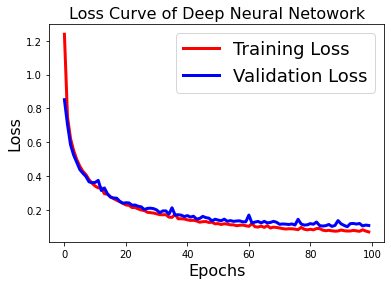

In [24]:
#Loss Curve


plt.plot(figsize = [8,6])

plt.plot(history.history['loss'],'r',linewidth = 3.0)
plt.plot(history.history['val_loss'],'b',linewidth = 3.0)

plt.legend(['Training Loss', 'Validation Loss'], fontsize = 18)

plt.xlabel('Epochs', fontsize = 16)
plt.ylabel('Loss', fontsize = 16)

plt.title('Loss Curve of Deep Neural Netowork' , fontsize = 16 )



Text(0.5, 1.0, 'Accuracy Curve of Deep Neural Netowork')

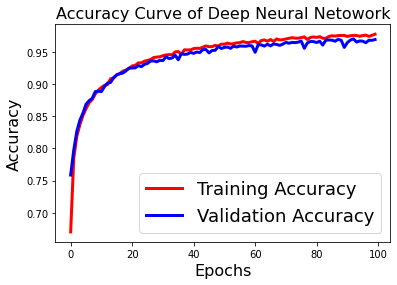

In [25]:
#Accuracy Curve

plt.plot(figsize = [8,6])
plt.plot(history.history['accuracy'],'r',linewidth = 3.0)
plt.plot(history.history['val_accuracy'],'b',linewidth = 3.0)

plt.legend(['Training Accuracy', 'Validation Accuracy'], fontsize = 18)

plt.xlabel('Epochs', fontsize = 16)
plt.ylabel('Accuracy', fontsize = 16)


plt.title('Accuracy Curve of Deep Neural Netowork' , fontsize = 16 )

##  4.2 Make Predictions

In [26]:
predictions = model.predict(X_test)
predictions = np.argmax(predictions, axis = 1)

In [27]:
predictions

array([16,  0,  8, ...,  0,  0,  0], dtype=int64)

#### Transforming from One Hot Encoding

In [28]:
y_test =np.argmax(y_test, axis=1)
y_test[1]

0

In [29]:
from sklearn.metrics import accuracy_score
accuracy = {accuracy_score(y_test, predictions)}
print(f"Accuracy is: {accuracy_score(y_test, predictions)* 100}")

Accuracy is: 96.956267135138


## 4.3 Classification Report

Classification report : 
               precision    recall  f1-score   support

           0       0.97      0.99      0.98     38828
           1       0.97      0.97      0.97      2247
           2       0.97      0.93      0.95      1964
           3       0.98      0.96      0.97      2266
           4       0.96      0.95      0.96      1973
           5       0.95      0.97      0.96      1941
           6       0.98      0.95      0.96      2045
           7       0.96      0.95      0.96      2179
           8       0.96      0.95      0.95      2155
           9       0.97      0.94      0.95      1927
          10       0.98      0.87      0.92      1749
          11       0.97      0.95      0.96      2132
          12       0.94      0.91      0.93      1925
          13       0.97      0.94      0.96      1471
          14       0.97      0.94      0.95      1342
          15       0.94      0.86      0.90      1338
          16       0.98      0.96      0.97      1480
 

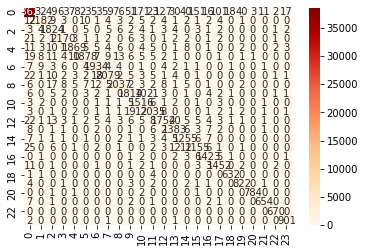

In [30]:
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score, classification_report
print('\033[1m' +'Classification report : '+ '\033[0m\n', classification_report(y_test, predictions))

cm = confusion_matrix(predictions, y_test)
print('\033[1m' +'Confusion Matrix : '+ '\033[0m')
sns.heatmap(cm, cmap = 'OrRd',annot = True, fmt='d')
plt.show()

## 4.4 Evaluation

In [31]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test,predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 0.2510979797173201
MSE: 3.023223934626953
RMSE: 1.7387420552304338


In [32]:
from sklearn.metrics import precision_score
print("Precision Score : ",precision_score(y_test, predictions, average='weighted'))


from sklearn.metrics import recall_score
print("Recall Score : ",recall_score(y_test, predictions,average='weighted'))


from sklearn.metrics import f1_score
print("f1_score : ",f1_score(y_test, predictions,average='weighted'))

Precision Score :  0.9696075811544312
Recall Score :  0.9695626713513801
f1_score :  0.9692954375661349
